<a href="https://colab.research.google.com/github/namoshi/ml_intro/blob/master/logit_iris_2d.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## カーネルロジスティック回帰
カーネルロジスティック回帰によるアヤメのデータ（２次元）の識別

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
#from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap
from sklearn.kernel_approximation import Nystroem
from sklearn.datasets import make_circles


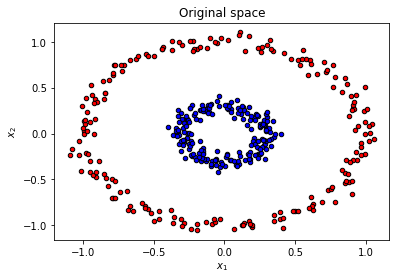

In [36]:
# Generate the circles data

np.random.seed(0)

X, y = make_circles(n_samples=400, factor=.3, noise=.05)

# Plot Oritinal Space

reds = y == 0
blues = y == 1

plt.scatter(X[reds, 0], X[reds, 1], c="red",
            s=20, edgecolor='k')
plt.scatter(X[blues, 0], X[blues, 1], c="blue",
            s=20, edgecolor='k')
plt.title("Original space")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.savefig("circles_data.png")
plt.show()

カーネルロジスティック回帰による学習（L2正則化：C=1.0）

In [37]:
# カーネル特徴の計算

feature_map_nystroem = Nystroem(kernel='rbf', gamma=.2, random_state=1, n_components=100)
data_transformed = feature_map_nystroem.fit_transform(X)
print(data_transformed)
print(data_transformed.shape)

[[0.01436095 0.22529832 0.12704089 ... 0.12796734 0.06138312 0.08001502]
 [0.06173454 0.09690946 0.12211708 ... 0.12781056 0.11009611 0.10703614]
 [0.04490456 0.12671032 0.13422706 ... 0.13017139 0.09982978 0.11452396]
 ...
 [0.02398137 0.14000731 0.10401945 ... 0.13367164 0.06664459 0.05797064]
 [0.21742104 0.01018846 0.04292469 ... 0.05119498 0.09594511 0.05568319]
 [0.0140945  0.14831703 0.11707073 ... 0.07533608 0.06317627 0.13262464]]
(400, 100)


In [38]:
# Logistic Regression for the transformed data

clf_LR = LogisticRegression(C=1.0, penalty='l2', tol=1e-6)
clf_LR.fit(data_transformed, y)

#coef_LR = clf_LR.coef_.ravel()
#sparsity_LR = np.mean(coef_LR == 0) * 100

print("Mean Accuracy: %.4f" % clf_LR.score(data_transformed, y))
#print("Sparsity of the parameters: %.2f%%" % sparsity_LR)

yy = clf_LR.predict(data_transformed)
pp = clf_LR.predict_proba(data_transformed)
#print('Estimated Classes\n', yy)
#print('Estimated Probability\n', pp)

Mean Accuracy: 1.0000


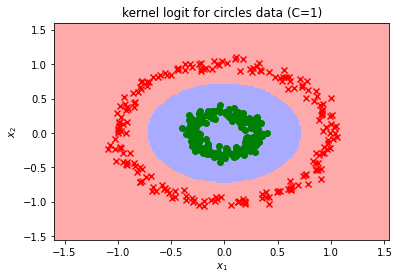

In [39]:
%matplotlib inline
# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

## colors
colors = ['red', 'green', 'blue']
markers = ['x', 'o', 'v']

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

(xsize, ysize) = xx.shape
nelm = xsize * ysize

XX = np.c_[xx.reshape((nelm,1)), yy.reshape((nelm,1))]
#print XX
data_transformed_XX = feature_map_nystroem.transform(XX)


Z = clf_LR.predict(data_transformed_XX)
#print('Z\n', Z)

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
#plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
for k, c, marker  in zip([0, 1], colors, markers):
    plt.scatter(X[y == k, 0], X[y == k, 1], c=c, marker=marker)
#plt.scatter(data[:, 0], data[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
#plt.legend()
plt.title('kernel logit for circles data (C=1)')
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.savefig('kernel_logit_circles.png')

#plt.xlim(xx.min(), xx.max())
#plt.ylim(yy.min(), yy.max())
#plt.xticks(())
#plt.yticks(())

plt.show()